In [1]:
import sys
sys.path.append('..')
%matplotlib inline

import math as m
import numpy as np
import scipy.signal as signal

import matplotlib
import matplotlib.pyplot as plt

from core import Core

from global_var import COLORS


In [2]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

10
core 2: SPR file not found. Diseable ploting of SPR. 
11
core 2: SPR file not found. Diseable ploting of SPR. 
12
core 2: SPR file not found. Diseable ploting of SPR. 


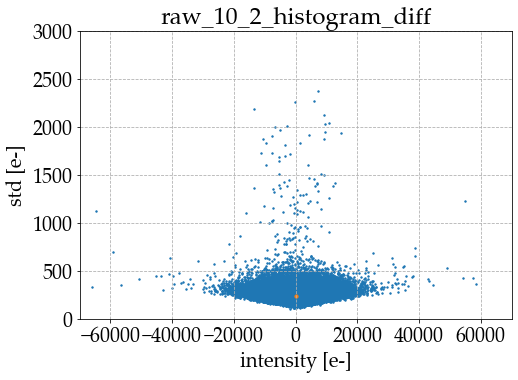

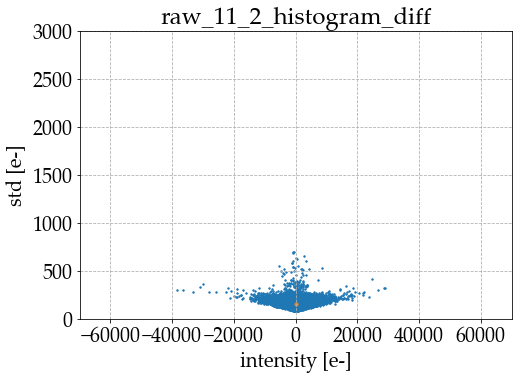

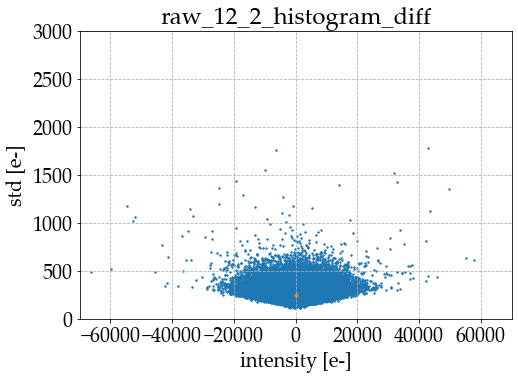

In [4]:
folder = r'C:\SPRUP_data_Jenda\2021_08_30_noise/'.replace('\\', '/')
folder = r'C:\SPRUP_data_Jenda\2021_09_08_noise/'.replace('\\', '/')

frame_time = [0.1047, 0.1308, 0.1308, 0.1002, 0.1003, 0.1046, 0.1305]
ets = [12.5, 5, 1, 25, 25, 12.5, 5]
avg = [8, 10, 10, 4, 4, 8, 10]
ma = [58.7, 60.7, 62.9, 56.0]

frame_time = [0.1046, 0.1046, 0.1046, 0.1046, 0.1308, 0.1308, 0.1046, 0.1046, 0.1046, 0.1046, 0.1308, 0.1003]
ets = [12.5, 12.5, 12.5, 12.5, 5, 5, 12.5, 12.5, 12.5, 12.5, 5, 25]
avg = [8, 8, 8, 8, 10, 10, 8, 8, 8, 8, 10, 4]
ma = ['sc'] * 6 + [58.7] * 6

for i in range(9, 12):
    print(i+1)
    name = 'raw_{}_2'.format(i+1)
    core = Core(folder, name)

    core.type = 'diff'

#     level = np.average(core._data_raw[::20, ::20, :] * avg[i] * 32000, axis = 2)
#     std = np.std(core._data_raw[::20, ::20, :] * avg[i] * 32000, axis = 2)
    
    level = np.average((core._data_raw[1:, 1:, :] - core._data_raw[:-1, :-1, :]) * avg[i] * 32000, axis = 2)
    std = np.std((core._data_raw[1:, 1:, :] - core._data_raw[:-1, :-1, :]) * avg[i] * 32000, axis = 2)
    
#     level = np.average(core._data_raw * avg[i] * 32000, axis = 2)
#     std = np.std(core._data_raw * avg[i] * 32000, axis = 2)

    level_avg = np.average(level)
    std_avg = np.average(std)

    figi = plt.figure()
    axesi = figi.add_axes([0.1, 0.1, 1, 1])
    axesi.grid(linestyle='--')

    title = name + '_histogram_diff'
    axesi.set_title(title)
    axesi.set_xlabel('intensity [e-]')
    axesi.set_ylabel('std [e-]')
#     axesi.set_xlim(0, 250000)
#     axesi.set_ylim(0, 4000)
    
    axesi.set_xlim(-70000, 70000)
    axesi.set_ylim(0, 3000)
    
    
    # axesi.scatter(np.abs(level), np.abs(std), s = 2)
    axesi.scatter(level, std, s = 2)
    axesi.scatter(level_avg, std_avg, s = 10)

    figi.savefig(folder + title +'.png', dpi=300, bbox_inches='tight')    


In [13]:
level_avg = np.average(level)
std_avg = np.average(std)

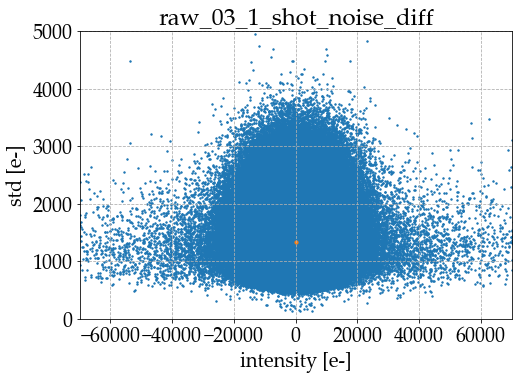

In [5]:
figi = plt.figure()
axesi = figi.add_axes([0.1, 0.1, 1, 1])
axesi.grid(linestyle='--')

title = name + '_histogram_diff'
axesi.set_title(title)
axesi.set_xlabel('intensity [e-]')
axesi.set_ylabel('std [e-]')
axesi.set_xlim(-70000, 70000)
axesi.set_ylim(0, 5000)
# axesi.scatter(np.abs(level), np.abs(std), s = 2)
axesi.scatter(level, std, s = 2)
axesi.scatter(level_avg, std_avg, s = 10)

# figi.savefig(folder + title +'.png', dpi=300, bbox_inches='tight')    
